In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Load the data and recast variable types

In [117]:
fsched = pd.read_csv(r"C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\Flight Schedule Detailed CUSP Export.csv")

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
brd = pd.read_excel(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\EWR_Data_Sept_2021.xlsx', sheet_name='EWR_Data_Sept_2021')

In [5]:
fsched.tail()

,Date,Military Time,Flight Direction,PA Airport Code,Terminal Desc,Non-PA Airport Code,Non-PA Airport Country Desc,International Domestic,State Desc,Marketing Airline Desc,Marketing Airline ICAO Code,Operating Airline Desc,Operating Airline ICAO Code,Flight Number,General Aircraft Desc,Variant Aircraft Desc,Variant Aircraft Code,Total Seats,Flight Distance,Total Flights
54864,12/31/2021,23:59:00,Arrival,EWR,EWR-Terminal B,SDQ,Dominican Republic,International,International,JetBlue Airways,JBU,JetBlue Airways,JBU,604.0,Airbus A318/319/320/321,Airbus A320,320,162,"1,557",1
54865,12/31/2021,23:59:00,Departure,EWR,EWR-Terminal B,SDQ,Dominican Republic,International,International,JetBlue Airways,JBU,JetBlue Airways,JBU,403.0,Airbus A318/319/320/321,Airbus A320,320,162,"1,557",1
54866,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,328,889",NaN,"54,878"
54867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54868,Applied filters:\nDate 1/1/2021 - 12/31/2021\n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fsched.dtypes

Date                            object
Military Time                   object
Flight Direction                object
PA Airport Code                 object
Terminal Desc                   object
Non-PA Airport Code             object
Non-PA Airport Country Desc     object
International Domestic          object
State Desc                      object
Marketing Airline Desc          object
Marketing Airline ICAO Code     object
Operating Airline Desc          object
Operating Airline ICAO Code     object
Flight Number                  float64
General Aircraft Desc           object
Variant Aircraft Desc           object
Variant Aircraft Code           object
Total Seats                     object
Flight Distance                 object
Total Flights                   object
dtype: object

In [118]:
#remove last 3 rows of fsched because they contain column totals
fsched = fsched.iloc[:-3,:]

In [119]:
#date conversions, create new date columns
fsched['datt'] = pd.to_datetime(fsched['Date'] + ' ' + fsched['Military Time'])
fsched.Date = fsched.datt.dt.date
fsched['month'] = fsched.datt.dt.month
fsched['year'] = fsched.datt.dt.year

In [148]:
#create dat period columns
fsched['dayperiod'] = 0
for i in fsched.index:
    if fsched.loc[i,'datt'].hour in [6,7,8,9,10,11,12]:
        fsched.loc[i,'dayperiod'] = 'morning'
    elif fsched.loc[i,'datt'].hour in [13,14,15,16,17]:
        fsched.loc[i,'dayperiod'] = 'afternoon'
    elif fsched.loc[i,'datt'].hour in[18,19,20,21,22]:
        fsched.loc[i,'dayperiod'] = 'evening'
    elif fsched.loc[i,'datt'].hour in[23,0,1,2,3,4,5]:
        fsched.loc[i,'dayperiod'] = 'overnight'

fsched.head()

,Date,Military Time,Flight Direction,PA Airport Code,Terminal Desc,Non-PA Airport Code,Non-PA Airport Country Desc,International Domestic,State Desc,Marketing Airline Desc,Marketing Airline ICAO Code,Operating Airline Desc,Operating Airline ICAO Code,Flight Number,General Aircraft Desc,Variant Aircraft Desc,Variant Aircraft Code,Total Seats,Flight Distance,Total Flights,datt,month,year,dayperiod
0,2021-01-01,00:59:00,Departure,EWR,EWR-Terminal B,SJU,USA,Domestic,Puerto Rico,Spirit Airlines,NKS,Spirit Airlines,NKS,1035.0,Airbus A318/319/320/321,Airbus A321 (Sharklets),32B,228,"1,608",1,2021-01-01 00:59:00,1,2021,overnight
1,2021-01-01,01:29:00,Arrival,EWR,EWR-Terminal B,STI,Dominican Republic,International,International,JetBlue Airways,JBU,JetBlue Airways,JBU,1494.0,Airbus A318/319/320/321,Airbus A321,321,200,"1,476",1,2021-01-01 01:29:00,1,2021,overnight
2,2021-01-01,04:25:00,Arrival,EWR,EWR-Terminal B,DEL,India,International,International,United Airlines,UAL,United Airlines,UAL,802.0,Boeing 777,Boeing 777-300ER,77W,350,"7,323",1,2021-01-01 04:25:00,1,2021,overnight
3,2021-01-01,04:45:00,Arrival,EWR,EWR-Terminal B,TLV,Israel,International,International,United Airlines,UAL,United Airlines,UAL,91.0,Boeing 787,Boeing 787-10,781,318,"5,692",1,2021-01-01 04:45:00,1,2021,overnight
4,2021-01-01,05:30:00,Arrival,EWR,EWR-Terminal B,SAL,El Salvador,International,International,United Airlines,UAL,United Airlines,UAL,341.0,Boeing 737,Boeing 737-900,739,179,"2,067",1,2021-01-01 05:30:00,1,2021,overnight


In [149]:
#numeric conversions
fsched['Total Seats'] = pd.to_numeric(fsched['Total Seats'])
fsched['Total Flights'] = pd.to_numeric(fsched['Total Flights'])
fsched['Flight Distance'] = fsched['Flight Distance'].str.replace(',', '').astype(float)

In [10]:
brd.head()

,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,RTS_DATA,RTS_ENQUEUED,PROK,TS,STAGING_TIMESTAMP,EVENT_TYPE,LEG,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2
0,9B25B853-96B0-477B-A57D-00000FD957E0,BFE97412EC0C9F94B91CD25F77E5004DE15F0248,2021-09-28 05:45:45,1,EWRBAKB018,NaN,NaN,NaN,NaN,2021-09-28 09:46:50.107,Print_BCBP,1,FM6RPE,LAS,BUR,NK,1652,2021-09-28,Y,026D,61,1,487.0,0TT11XK1K8,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-28 09:47:22.980
1,7EB30923-789D-4154-98C6-00001F18CD27,61D727C12F09B1FD803E5614E3EDD81B9D6CA217,2021-09-26 16:04:55,1,EWRBAKB001,NaN,NaN,NaN,NaN,2021-09-26 20:04:50.247,Print_BCBP,1,DEM3GZ,EWR,MYR,NK,54,2021-09-26,Y,0,166,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-26 20:04:50.247
2,1826AF57-3129-4355-9DEF-000058C854B7,A7E458694C3A1E2A0AB99D535538F8F50B621479,2021-09-19 20:41:14,1,EWRBCKB087,NaN,NaN,NaN,NaN,2021-09-20 00:40:48.207,Print_BCBP,1,4Q2B6B,EWR,RZE,LO,18,2021-09-19,Y,015B,87,3,80.0,7643411085,0.0,NaN,LO,NaN,NaN,NaN,NaN,NaN,2021-09-20 02:23:55.090
3,EF168078-B7C3-4BCF-A8C2-0000A1142BA4,96D0CEC3B0DEA035F491F369E24380D2975C54A8,2021-09-12 18:08:49,1,EWRBCKB097,NaN,NaN,NaN,NaN,2021-09-12 22:08:31.853,Print_BCBP,1,FKWM7U,MCO,ORD,NK,912,2021-09-13,Y,035C,92,1,487.0,0TT11SNKYY,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-12 22:09:13.287
4,28D1C99A-40D5-4A40-9381-0000A7373B6F,0F7F8061D3461E0D144933171EE09C6720ECDE8B,2021-09-10 04:56:43,1,EWRBAKB005,NaN,NaN,NaN,NaN,2021-09-10 08:57:27.193,Print_BCBP,1,VK9M5K,LAS,BUR,NK,1652,2021-09-10,Y,022E,57,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-10 08:57:52.870


In [11]:
brd.FLIGHT_NUMBER.isna().sum()

4930

In [150]:
#filter out 4,930 rows with no flight info
brd1 = brd[brd.FLIGHT_NUMBER.notna()]
brd1.shape

(340062, 33)

In [151]:
#drop useless columns
brd1 = brd1.drop(['RTS_DATA', 'RTS_ENQUEUED','PROK','TS','LEG'],axis=1)

## Compare total check-in vs boarding numbers

In [14]:
#how many of these are check-ins vs boardings?
brd1.LOCATION_POINT.value_counts()

1    226210
7    113852
Name: LOCATION_POINT, dtype: int64

In [15]:
#weird that there are more check-ins than boardings. Expected the opposite (because mobile checkins are excluded).
# Who is checking in that isn't boarding?
brdbrd = brd1[brd1['LOCATION_POINT'] == 7]
chn = brd1[brd1['LOCATION_POINT'] == 1]
chnbrd = brd1[(brd1['LOCATION_POINT'] == 1) & (~brd1['HASH_DATA'].isin(brdbrd['HASH_DATA']))]
brdnch = brd1[(brd1['LOCATION_POINT'] == 7) & (~brd1['HASH_DATA'].isin(chn['HASH_DATA']))]
brch_matched = brd1[(brd1['HASH_DATA'].isin(chn['HASH_DATA'])) & (brd1['HASH_DATA'].isin(brdbrd['HASH_DATA']))]

print(f'Checkin AND boarded (includes both records): {brch_matched.shape[0]}')
print(f'Checkin but no board: {chnbrd.shape[0]}')
print(f'Board but no checkin: {brdnch.shape[0]}')


Checkin AND boarded (includes both records): 114821
Checkin but no board: 162525
Board but no checkin: 62716


In [16]:
#let's repeat this based on PNR record number instead of HASH_DATA
chnbrd_pn = brd1[(brd1['LOCATION_POINT'] == 1) & (~brd1['PNR'].isin(brdbrd['PNR']))]
brdnch_pn = brd1[(brd1['LOCATION_POINT'] == 7) & (~brd1['PNR'].isin(chn['PNR']))]
brch_matched_pn = brd1[(brd1['PNR'].isin(chn['PNR'])) & (brd1['PNR'].isin(brdbrd['PNR']))]

print(f'Checkin AND boarded (includes both records): {brch_matched_pn.shape[0]}')
print(f'Checkin but no board: {chnbrd_pn.shape[0]}')
print(f'Board but no checkin: {brdnch_pn.shape[0]}')

Checkin AND boarded (includes both records): 153121
Checkin but no board: 130691
Board but no checkin: 56250


In [17]:
#I'm not sure why the PNR number does a better job than the HASH_DATA, but there are still lots of checkins without corresponding boardings

In [18]:
brd1.head()

,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2
0,9B25B853-96B0-477B-A57D-00000FD957E0,BFE97412EC0C9F94B91CD25F77E5004DE15F0248,2021-09-28 05:45:45,1,EWRBAKB018,2021-09-28 09:46:50.107,Print_BCBP,FM6RPE,LAS,BUR,NK,1652,2021-09-28,Y,026D,61,1,487.0,0TT11XK1K8,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-28 09:47:22.980
1,7EB30923-789D-4154-98C6-00001F18CD27,61D727C12F09B1FD803E5614E3EDD81B9D6CA217,2021-09-26 16:04:55,1,EWRBAKB001,2021-09-26 20:04:50.247,Print_BCBP,DEM3GZ,EWR,MYR,NK,54,2021-09-26,Y,0,166,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-26 20:04:50.247
2,1826AF57-3129-4355-9DEF-000058C854B7,A7E458694C3A1E2A0AB99D535538F8F50B621479,2021-09-19 20:41:14,1,EWRBCKB087,2021-09-20 00:40:48.207,Print_BCBP,4Q2B6B,EWR,RZE,LO,18,2021-09-19,Y,015B,87,3,80.0,7643411085,0.0,NaN,LO,NaN,NaN,NaN,NaN,NaN,2021-09-20 02:23:55.090
3,EF168078-B7C3-4BCF-A8C2-0000A1142BA4,96D0CEC3B0DEA035F491F369E24380D2975C54A8,2021-09-12 18:08:49,1,EWRBCKB097,2021-09-12 22:08:31.853,Print_BCBP,FKWM7U,MCO,ORD,NK,912,2021-09-13,Y,035C,92,1,487.0,0TT11SNKYY,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-12 22:09:13.287
4,28D1C99A-40D5-4A40-9381-0000A7373B6F,0F7F8061D3461E0D144933171EE09C6720ECDE8B,2021-09-10 04:56:43,1,EWRBAKB005,2021-09-10 08:57:27.193,Print_BCBP,VK9M5K,LAS,BUR,NK,1652,2021-09-10,Y,022E,57,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-10 08:57:52.870


In [19]:
#check columns to see if a certain variable contains a disproportionate number of the missing records
for c in ['WORKSTATION','EVENT_TYPE','FROM_AIRPORT_CODE','TO_AIRPORT_CODE','CARRIER_CODE','FLIGHT_NUMBER','COMPARTMENT_CODE']:
    comp = pd.concat([(brd1[c].value_counts(dropna=False) / brd1.shape[0]),(chnbrd_pn[c].value_counts(dropna=False) / chnbrd_pn.shape[0])], axis =1)
    comp.columns = ['all_records','chnbrd']
    comp['dif'] = comp.all_records - comp.chnbrd
    for x in comp.index:
        if comp.loc[x,'dif'] < -.1:
            print(f'{c} == {x} explains a disproportionate number of the missing boardings')
        if comp.loc[x,'dif'] > .1:
            print(f'{c} != {x} explains a disproportionate number of the missing boardings')

EVENT_TYPE == Print_BCBP explains a disproportionate number of the missing boardings
EVENT_TYPE != Scan_BCBP explains a disproportionate number of the missing boardings
CARRIER_CODE == NK explains a disproportionate number of the missing boardings
COMPARTMENT_CODE == Y explains a disproportionate number of the missing boardings


In [20]:
#Spirit Airlines has the majority of missing boardings (101k or 77%), while JetBlue has none. What do they do differently?
comp = pd.concat([(brd1['CARRIER_CODE'].value_counts(dropna=False) / brd1.shape[0]),(chnbrd_pn['CARRIER_CODE'].value_counts(dropna=False) / chnbrd_pn.shape[0])], axis =1)
comp.columns = ['all_records','chnbrd']
comp['dif'] = comp.all_records - comp.chnbrd
comp.sort_values(by='dif',inplace=True)
comp

,all_records,chnbrd,dif
NK,0.430918,0.774958,-0.344039
PD,0.010298,0.024355,-0.014057
EK,0.010748,0.021157,-0.010409
ET,0.007437,0.016880,-0.009443
BF,0.007604,0.016971,-0.009367
F9,0.093842,0.102960,-0.009119
B0,0.005834,0.011064,-0.005230
KP,0.000632,0.001592,-0.000959
OA,0.000126,0.000253,-0.000126
FZ,0.000056,0.000138,-0.000082


In [21]:
#this seems reasonable. At check-in, most people are printing boarding passes with a few scanning, and at boarding, most records are scans with a few prints
brd1[['LOCATION_POINT','EVENT_TYPE','HASH_DATA']].groupby(by=['LOCATION_POINT','EVENT_TYPE']).count()

HASH_DATA
LOCATION_POINT EVENT_TYPE           
1              Print_BCBP     217973
               Scan_BCBP        8237
7              Print_BCBP      11949
               Scan_BCBP      101903

## Explore the HASH_DATA field. What exactly does it correspond to?

In [22]:
#It is not unique. I expected it to correspond to a boarding pass, i.e. that there would be a record at checkin and boarding (total 2), 
# but there are some HASH_DATA values that occur many more times than that. Are these individuals who flew several times in September 2021?
brd1.HASH_DATA.value_counts()

3A39B750C42BCFB3B557C5ECAF0FD56D3145E326    44
3A498E582D3217AE2DE63BADE218D375AAB0FFAE    31
2B8350552062B351B378AE1D0C888B4177BDE1DB    20
4A5759F137332EBFABF21D906413CD98FC3CD345    20
2A93215AF72502CDDD7619A09AA68D9729533D3E    15
                                            ..
74D07B55833683FE94F0B7E7C18D53265E19DDA0     1
871741DFDE65B7236C0496FC85BF324C4B4A5413     1
A53E9D0DB868C416CD919913E494014916E3A70C     1
F30EF1CF79A2226547A29822D7DFBBA76E1D0395     1
4E0E844CB6CA74A83C1BB6DF656BE9CFF230CD9A     1
Name: HASH_DATA, Length: 203125, dtype: int64

In [23]:
#let's look at the most common HASH_DATA value
FF = brd1[brd1['HASH_DATA'] == '3A39B750C42BCFB3B557C5ECAF0FD56D3145E326']

In [24]:
#This is confusing because this person apparently checked in several times on September 11 with the same seat number, which doesn't make sense.
FF.sort_values(by = ['EVENT_LOGTIME'], ascending=True, inplace = True)
FF.head()

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2
316762,30AC5D0A-8952-4126-870F-EB15123BD4F5,3A39B750C42BCFB3B557C5ECAF0FD56D3145E326,2021-09-11 12:52:58,1,EWRBAKB014,2021-09-11 16:53:10.257,Print_BCBP,BCNZVC,EWR,IAH,NK,703,2021-09-11,Y,026F,96,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-11 17:15:08.860
135974,2A79C015-01B1-4167-9BE2-64E4BBF72652,3A39B750C42BCFB3B557C5ECAF0FD56D3145E326,2021-09-11 12:52:58,1,EWRBAKB014,2021-09-11 16:53:41.953,Print_BCBP,BCNZVC,EWR,IAH,NK,703,2021-09-11,Y,026F,96,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-11 17:15:08.860
6811,549D95AC-8E0C-4281-90E6-0523EB57CD25,3A39B750C42BCFB3B557C5ECAF0FD56D3145E326,2021-09-11 12:58:40,1,EWRBAKB014,2021-09-11 16:58:11.327,Scan_BCBP,BCNZVC,EWR,IAH,NK,703,2021-09-11,Y,026F,96,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-11 17:15:08.860
191379,8C9A0CD2-3A28-4790-A480-8E30FF99D8E0,3A39B750C42BCFB3B557C5ECAF0FD56D3145E326,2021-09-11 12:58:54,1,EWRBAKB014,2021-09-11 16:58:46.207,Scan_BCBP,BCNZVC,EWR,IAH,NK,703,2021-09-11,Y,026F,96,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-11 17:15:08.860
166007,389A8AD7-BBEC-461A-A457-7B554A487FD2,3A39B750C42BCFB3B557C5ECAF0FD56D3145E326,2021-09-11 12:59:17,1,EWRBAKB014,2021-09-11 16:58:56.587,Scan_BCBP,BCNZVC,EWR,IAH,NK,703,2021-09-11,Y,026F,96,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-11 17:15:08.860


In [25]:
#Also of the records associated with this HASH_DATA, all are for checkins, not boardings. This must be a fluke or a duplicate record.
FF.LOCATION_POINT.value_counts()

1    44
Name: LOCATION_POINT, dtype: int64

In [26]:
#Let's check a different HASH_DATA value
FF1 = brd1[brd1['HASH_DATA'] == '2A93215AF72502CDDD7619A09AA68D9729533D3E']
FF1.LOCATION_POINT.value_counts()

1    15
Name: LOCATION_POINT, dtype: int64

In [27]:
#this one also looks like duplicate check-ins.
FF1.sort_values(by = ['EVENT_LOGTIME'], ascending=True, inplace = True)
FF1.head()

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2
20,F93BFA77-4A7E-44EC-B6BC-0004B6E35B9A,2A93215AF72502CDDD7619A09AA68D9729533D3E,2021-09-03 15:20:56,1,EWRBAKB023,2021-09-03 19:21:04.863,Print_BCBP,FYC3GI,EWR,BNA,NK,1174,2021-09-03,Y,023B,96,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-03 19:51:53.490
12543,06540A58-7E4A-4749-BA1D-095F4A92A509,2A93215AF72502CDDD7619A09AA68D9729533D3E,2021-09-03 15:20:56,1,EWRBAKB023,2021-09-03 19:21:42.040,Print_BCBP,FYC3GI,EWR,BNA,NK,1174,2021-09-03,Y,023B,96,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-03 19:51:53.490
310402,8FC4E38F-0D36-49DB-807F-E65310B8C1FC,2A93215AF72502CDDD7619A09AA68D9729533D3E,2021-09-03 15:23:29,1,EWRBAKB023,2021-09-03 19:23:40.410,Scan_BCBP,FYC3GI,EWR,BNA,NK,1174,2021-09-03,Y,023B,96,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-03 19:51:53.490
136214,55487196-A7E8-4F18-B599-6513805C9303,2A93215AF72502CDDD7619A09AA68D9729533D3E,2021-09-03 15:24:12,1,EWRBAKB023,2021-09-03 19:24:45.050,Print_BCBP,FYC3GI,EWR,BNA,NK,1174,2021-09-03,Y,023B,96,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-03 19:51:53.490
149252,195539BC-1919-4221-9A35-6EF377B4D0FD,2A93215AF72502CDDD7619A09AA68D9729533D3E,2021-09-03 15:24:12,1,EWRBAKB023,2021-09-03 19:25:09.257,Print_BCBP,FYC3GI,EWR,BNA,NK,1174,2021-09-03,Y,023B,96,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-03 19:51:53.490


In [28]:
#how many duplicate records are there
brd1.duplicated(subset=['HASH_DATA','LOCATION_POINT','WORKSTATION','EVENT_TYPE','PNR','FROM_AIRPORT_CODE','TO_AIRPORT_CODE','CARRIER_CODE','FLIGHT_NUMBER','FLIGHT_DATE','SEAT_NUMBER','SEQUENCE_NUMBER']).sum()

74376

In [29]:
#most of those duplicates came from Spirit. Let's drop all of these duplicates.
brd1.loc[brd1.duplicated(subset=['HASH_DATA','LOCATION_POINT','WORKSTATION','EVENT_TYPE','PNR','FROM_AIRPORT_CODE','TO_AIRPORT_CODE','CARRIER_CODE','FLIGHT_NUMBER','FLIGHT_DATE','SEAT_NUMBER','SEQUENCE_NUMBER']),'CARRIER_CODE'].value_counts()

NK     64203
AI      1407
F9      1331
TK      1187
B6      1055
B0       959
LH       947
TP       612
OS       397
LY       392
LX       319
SK       266
ET       264
LO       236
PD       184
FI       142
BF       141
EK       126
G4       112
SY        31
WK        10
PS        10
DL         7
AC         6
XQ         5
OA         4
OU         3
RFL        3
KC         3
EN         3
UA         2
ZB         2
KP         2
FZ         1
AS         1
9I         1
SN         1
KQ         1
Name: CARRIER_CODE, dtype: int64

In [30]:
brd1.drop_duplicates(subset=['HASH_DATA','LOCATION_POINT','EVENT_TYPE','PNR','FROM_AIRPORT_CODE','TO_AIRPORT_CODE','CARRIER_CODE','FLIGHT_NUMBER','FLIGHT_DATE','SEAT_NUMBER','SEQUENCE_NUMBER'],inplace=True)

In [31]:
#now let's check again. This is much more reasonable, but still who are the repeat HASH_DATA values?
brd1.HASH_DATA.value_counts()

E8408B15A568471BC91CBCAEC16AAA59123E2A5A    4
478A74BF8406B97499B6BDC323C49F4BE3591AD6    4
D3FAE494A635642B96DDBE7BC907F5C915136FD9    4
C1803909F05E105F3EE3D4A86ECB635755CB4552    4
8A7B82B21521C26CECAD0340C5C31494F937B633    4
                                           ..
AD3B5779ECC5167E5ED378A7E07159FF57C387F2    1
D027B06ED151A266AFA2A7FE610F20775BCF17DE    1
0227A81E2F118A1AE8D8099519CB67DD9643D89C    1
9C61C3F8ED5765E1C492516C2E8B90AE6412827F    1
4E0E844CB6CA74A83C1BB6DF656BE9CFF230CD9A    1
Name: HASH_DATA, Length: 203125, dtype: int64

In [32]:
#let's pick another one to explore. Looks like this person scanned and printed their boarding pass at both check-in and boarding, but it is the 
# same seat number, so I don't think this represents multiple people
FF2 = brd1[brd1['HASH_DATA'] == 'E8408B15A568471BC91CBCAEC16AAA59123E2A5A']
FF2.sort_values(by = ['EVENT_LOGTIME'], ascending=True, inplace = True)
FF2.head()

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2
277379,3A4DDBB7-1245-4304-86F9-CDF7CFF64591,E8408B15A568471BC91CBCAEC16AAA59123E2A5A,2021-09-15 04:07:36,1,EWRBAKB024,2021-09-15 08:08:04.730,Scan_BCBP,UD4Z2C,EWR,MCO,NK,1250,2021-09-15,Y,036D,96,1,487.0,656159059,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-15 09:38:12.327
116726,9ED2C21D-23AB-4754-8E4A-569164094086,E8408B15A568471BC91CBCAEC16AAA59123E2A5A,2021-09-15 04:11:18,1,EWRBAKB024,2021-09-15 08:12:25.357,Print_BCBP,UD4Z2C,EWR,MCO,NK,1250,2021-09-15,Y,036D,96,1,487.0,656159059,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-15 09:38:12.327
5406,AFF016F5-4974-4454-9A25-0416015F1E9E,E8408B15A568471BC91CBCAEC16AAA59123E2A5A,2021-09-15 05:35:51,7,EWRBGTC66A,2021-09-15 09:36:55.100,Print_BCBP,UD4Z2C,EWR,MCO,NK,1250,2021-09-15,Y,036D,96,1,487.0,656159059,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-15 09:38:12.327
164787,09449B8D-2ECD-4C8B-998E-7A6EF1FD4367,E8408B15A568471BC91CBCAEC16AAA59123E2A5A,2021-09-15 05:37:25,7,EWRBGTP66B,2021-09-15 09:38:12.327,Scan_BCBP,UD4Z2C,EWR,MCO,NK,1250,2021-09-15,Y,036D,96,1,487.0,656159059,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-15 09:38:12.327


In [33]:
#same as the last scenario. I think this means that each HASH_DATA represents a single boarding pass.
FF3 = brd1[brd1['HASH_DATA'] == '8A7B82B21521C26CECAD0340C5C31494F937B633']
FF3.sort_values(by = ['EVENT_LOGTIME'], ascending=True, inplace = True)
FF3.head()

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2
165350,C5977B6A-B719-4EA1-94F5-7ADA6BC6014C,8A7B82B21521C26CECAD0340C5C31494F937B633,2021-09-23 03:56:57,1,EWRBAKB013,2021-09-23 07:57:19.020,Print_BCBP,RC8LRV,EWR,FLL,NK,521,2021-09-23,Y,032F,26,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-23 08:45:12.917
9772,04623B3F-D64B-4FD2-817F-074A5459055D,8A7B82B21521C26CECAD0340C5C31494F937B633,2021-09-23 03:58:44,1,EWRBAKB013,2021-09-23 07:59:28.470,Scan_BCBP,RC8LRV,EWR,FLL,NK,521,2021-09-23,Y,032F,26,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-23 08:45:12.917
152306,99DB74F9-9495-4B82-A74B-713B62ADEFBC,8A7B82B21521C26CECAD0340C5C31494F937B633,2021-09-23 04:21:37,7,EWRBGTC67A,2021-09-23 08:21:32.300,Print_BCBP,RC8LRV,EWR,FLL,NK,521,2021-09-23,Y,032F,26,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-23 08:45:12.917
297108,1E8C6038-A7BD-4A94-899C-DC94D4E6131F,8A7B82B21521C26CECAD0340C5C31494F937B633,2021-09-23 04:44:13,7,EWRBGTP67B,2021-09-23 08:45:12.917,Scan_BCBP,RC8LRV,EWR,FLL,NK,521,2021-09-23,Y,032F,26,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-23 08:45:12.917


## If the HASH_DATA is for a single boarding pass, what exactly does the PNR represent?

In [34]:
brd1.PNR.value_counts()

ZZZZZZZ    889
G9G1HM     134
PEJZ3R     129
PYLABJ      84
THXUG3      79
          ... 
GLGEGN       1
ADQ55Z       1
9b483f3      1
AFND6D       1
X6GWPL       1
Name: PNR, Length: 109557, dtype: int64

In [35]:
#The PNR appears to be the confirmation number, which could include multiple people. For example, this PNR appears to be a large group trip
#But again, note that these are all check-ins -- no boarding records! Still a mystery how we have check-in but no boarding scans.
pnr1 = brd1[brd1['PNR'] == 'G9G1HM']
pnr1.sort_values(by = ['EVENT_LOGTIME'], ascending=True, inplace = True)
pnr1.head()

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2
74049,1069A0D9-396E-4050-8E2B-370249C3D0F0,F0E89B59B6590C107B04F8275D8282BF9195AEE6,2021-09-25 18:17:51,1,EWRBCKB122,2021-09-25 22:17:38.720,Print_BCBP,G9G1HM,EWR,MCO,F9,1259,2021-09-25,Y,028D,12,3,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 22:17:38.720
89747,2A5DC3F1-4D83-4C9D-A0FA-42A262B7E486,9D20CFF28C45871A780577B7FE42509A94DD7B3C,2021-09-25 18:28:49,1,EWRBCKB122,2021-09-25 22:29:00.020,Print_BCBP,G9G1HM,EWR,MCO,F9,1259,2021-09-25,Y,011A,13,3,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 22:29:00.020
238345,6FC6E1B3-03E3-41C8-B97B-B0E354AA9A05,D6088A253F6A978C539A80211E37619FC9B49E24,2021-09-25 18:28:54,1,EWRBCKB122,2021-09-25 22:29:01.503,Print_BCBP,G9G1HM,EWR,MCO,F9,1259,2021-09-25,Y,011B,14,3,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 22:29:01.503
202601,ABB16671-CE69-4F07-9F49-969C08E298F1,DCAAECE170FF21D633DED618FA04BF219D007C0F,2021-09-25 18:28:58,1,EWRBCKB122,2021-09-25 22:29:02.880,Print_BCBP,G9G1HM,EWR,MCO,F9,1259,2021-09-25,Y,011C,15,3,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 22:29:02.880
151741,96D4F488-7E62-4974-BC64-70CAE31A5489,08268FEB388D2606AE98416DD1F7A43697D1A582,2021-09-25 18:29:03,1,EWRBCKB122,2021-09-25 22:29:04.273,Print_BCBP,G9G1HM,EWR,MCO,F9,1259,2021-09-25,Y,011D,16,3,0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 22:29:04.273


## I'm curious about the SEQUENCE_NUMBER - does it account for mobile/online check-ins?

In [36]:
brd1.SEQUENCE_NUMBER.value_counts()

1        7546
3        2038
2        2010
5        1966
4        1961
         ... 
530         1
518         1
529         1
0051r       1
0113r       1
Name: SEQUENCE_NUMBER, Length: 787, dtype: int64

In [37]:
#have to get rid of some records and recast the sequence to an int
brd1['dt_fl'] = brd1['EVENT_LOGTIME'].dt.strftime('%Y%m%d').astype(str) + brd1['FLIGHT_NUMBER'].astype(str) + brd1['CARRIER_CODE'].astype(str)
brd2 = brd1
brd2.SEQUENCE_NUMBER.dropna(inplace=True)
brd2 = brd2[brd2.SEQUENCE_NUMBER.astype(str).str.isnumeric()]
brd2.SEQUENCE_NUMBER = brd2.SEQUENCE_NUMBER.astype(int)

C:\Users\Gabriel\anaconda3\envs\ADS2\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
#what is the minimum SEQUENCE_NUMBER for each flight?
sqfl = brd2[['dt_fl','CARRIER_CODE','SEQUENCE_NUMBER']].groupby(by=['dt_fl','CARRIER_CODE'],as_index=False).min().sort_values('SEQUENCE_NUMBER')
sqfl

,dt_fl,CARRIER_CODE,SEQUENCE_NUMBER
6844,20210923694TK,TK,0
645,20210902881NK,NK,0
7429,20210925459TK,TK,0
3864,20210913708TK,TK,0
222,20210901659NK,NK,0
...,...,...,...
3307,202109119999OLH,LH,9999
5550,202109189999OLH,LH,9999
4532,202109159999OLH,LH,9999
1030,202109039999OLH,LH,9999


In [39]:
#By airline, what is the average, min, and max starting SEQUENCE_NUMBER?
# This suggests that some airlines account for online/mobile check-ins in the SEQUENCE_NUMBER
sqfl[['CARRIER_CODE','SEQUENCE_NUMBER']].groupby(['CARRIER_CODE']).agg({'SEQUENCE_NUMBER':['mean','min','max']}).sort_values(('SEQUENCE_NUMBER','mean'))

SEQUENCE_NUMBER           
                        mean  min   max
CARRIER_CODE                           
RFL                 0.000000    0     0
DL                  1.000000    1     1
9K                  1.000000    1     1
G4                  1.000000    1     1
B0                  1.000000    1     1
KQ                  1.000000    1     1
BA                  2.000000    1     3
9I                  4.000000    1     7
BT                  4.000000    3     5
JU                  6.000000    6     6
RJ                  6.000000    6     6
PD                  6.189024    1    58
SK                  7.370370    1    99
TP                  7.614286    1   106
FI                  8.285714    1   148
AC                  8.333333    1    12
ZB                 11.833333    1    26
B6                 14.391608    1   175
NH                 15.000000   15    15
LO                 17.100529    1    68
AI                 17.758514    1    88
ET                 18.646465    1   118
XQ                 21.869565    2    50
KC                 22.333333   17    25
KP                 23.763889    1   101
SN                 24.000000    4    55
EN                 24.061856    1    87
SY                 24.333333    1   166
EY                 27.000000    1    53
A3                 29.500000   16    43
F9                 31.736559    1   184
WY                 32.000000   13    43
WK                 32.030303    1   101
OU                 33.352941    1    88
OS                 35.331373    1   960
EW                 35.615385    1   114
TK                 36.533960    0   183
NK                 37.796368    0   204
4Y                 44.500000    1    88
GF                 45.000000   45    45
LX                 46.045259    1   237
PS                 53.368421   14   127
OA                 54.400000    5   106
FZ                 59.583333    1   145
UA                 61.666667    1   126
KM                 62.200000   36    79
AF                 63.000000   63    63
XK                 67.000000   67    67
EK                 85.889571    1   331
LH                142.183463    1  9999
AS                150.000000  150   150
LY               1311.260870    1  9999
BF               4653.107143    1  9999

## Prepare the SITA and flight schedule data to be merged for further analysis

In [40]:
#schedule and SITA data can be matched based on the combination of flight number, flight date, and airline.
#need the crosswalk between airline IATA and ICAO codes
al_map = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\Data\Airlines Mapping.csv')
al_map.head()

,Marketing Airline Desc,Marketing Airline IATA Code,Marketing Airline ICAO Code,Marketing Airline Country
0,ABC Aerolineas,4O,AIJ,Mexico
1,Aer Lingus,EI,EIN,Ireland
2,Aeroenlaces Nacionales,VB,VIV,Mexico
3,Aeroflot Russian Airlines,SU,AFL,Russia
4,Aerolineas Argentinas,AR,ARG,Argentina


In [152]:
#filter schedule data for september 2021
fsched_0921 = fsched[(fsched['month'] == 9) & (fsched['year'] == 2021)]
fsched_0921.shape

(4976, 24)

In [153]:
fsched_0921 = fsched_0921.merge(al_map[['Marketing Airline IATA Code','Marketing Airline ICAO Code']],left_on='Operating Airline ICAO Code',right_on='Marketing Airline ICAO Code')
fsched_0921.rename({'Marketing Airline IATA Code':'OpAL_IATACode','Marketing Airline ICAO Code_y':'OpAL_ICAOCode'},axis =1, inplace=True)

In [154]:
#we only want departing flights from Newark
fsched_0921 = fsched_0921[fsched_0921['Flight Direction'] == 'Departure']

In [155]:
#filter out transfer passengers from boarding data
brd1 = brd1[brd1['FROM_AIRPORT_CODE'] == 'EWR']
brd1.shape

(298166, 28)

In [156]:
fsched_0921['Flight Number'] = fsched_0921['Flight Number'].astype(int)
fsched_0921['Flight Number'] = fsched_0921['Flight Number'].astype(str)

In [157]:
fsched_0921['dt_fl'] = fsched_0921['datt'].dt.strftime('%Y%m%d').astype(str) + fsched_0921['Flight Number'].astype(str) + fsched_0921['OpAL_IATACode']
brd1['dt_fl'] = brd1['EVENT_LOGTIME'].dt.strftime('%Y%m%d').astype(str) + brd1['FLIGHT_NUMBER'].astype(str) + brd1['CARRIER_CODE'].astype(str)

## Check how many flights are missing from the checkin/boarding data

In [158]:
#I want to see how many scheduled flights are missing from the SITA data. Do an outer join to keep flight schedule data with missing passenger records
mrf = pd.merge(fsched_0921, brd1, how = 'outer',left_on = 'dt_fl', right_on = 'dt_fl', indicator = True)
mrf.head()

,Date,Military Time,Flight Direction,PA Airport Code,Terminal Desc,Non-PA Airport Code,Non-PA Airport Country Desc,International Domestic,State Desc,Marketing Airline Desc,Marketing Airline ICAO Code_x,Operating Airline Desc,Operating Airline ICAO Code,Flight Number,General Aircraft Desc,Variant Aircraft Desc,Variant Aircraft Code,Total Seats,Flight Distance,Total Flights,datt,month,year,dayperiod,OpAL_IATACode,OpAL_ICAOCode,dt_fl,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2,_merge
0,2021-09-01,05:00:00,Departure,EWR,EWR-Terminal B,FLL,USA,Domestic,Florida,Spirit Airlines,NKS,Spirit Airlines,NKS,521,Airbus A318/319/320/321,Airbus A321 (Sharklets),32B,228.0,1065.0,1.0,2021-09-01 05:00:00,9.0,2021.0,overnight,NK,NKS,20210901521NK,B6E6AE49-EA54-4E82-A009-0050A803AB27,C4D882109DFF8617AD377E61AC98D0608FF95A5E,2021-09-01 04:43:18,7.0,EWRBGTP67B,2021-09-01 08:44:09.417,Print_BCBP,NELE8Z,EWR,FLL,NK,521,2021-09-01,Y,021D,196,3,487.0,00A3931885,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-01 08:44:09.417,both
1,2021-09-01,05:00:00,Departure,EWR,EWR-Terminal B,FLL,USA,Domestic,Florida,Spirit Airlines,NKS,Spirit Airlines,NKS,521,Airbus A318/319/320/321,Airbus A321 (Sharklets),32B,228.0,1065.0,1.0,2021-09-01 05:00:00,9.0,2021.0,overnight,NK,NKS,20210901521NK,7790451F-7FFD-44FC-9A03-006CD8093891,490907DB350F0F1866C2FE0594C8A100F5781CDC,2021-09-01 04:32:49,7.0,EWRBGTC67A,2021-09-01 08:33:31.523,Print_BCBP,PC8Y2S,EWR,FLL,NK,521,2021-09-01,Y,025A,31,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-01 08:44:42.690,both
2,2021-09-01,05:00:00,Departure,EWR,EWR-Terminal B,FLL,USA,Domestic,Florida,Spirit Airlines,NKS,Spirit Airlines,NKS,521,Airbus A318/319/320/321,Airbus A321 (Sharklets),32B,228.0,1065.0,1.0,2021-09-01 05:00:00,9.0,2021.0,overnight,NK,NKS,20210901521NK,FB00EF83-0C5A-4030-9EB7-00F1B89E9CDD,A6711E8215A95CBADEA95DE45721932BBA0D2C2F,2021-09-01 04:44:49,7.0,EWRBGTP67B,2021-09-01 08:45:48.867,Scan_BCBP,TFZ3HM,EWR,FLL,NK,521,2021-09-01,Y,022B,140,3,487.0,661802249,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-01 08:45:48.867,both
3,2021-09-01,05:00:00,Departure,EWR,EWR-Terminal B,FLL,USA,Domestic,Florida,Spirit Airlines,NKS,Spirit Airlines,NKS,521,Airbus A318/319/320/321,Airbus A321 (Sharklets),32B,228.0,1065.0,1.0,2021-09-01 05:00:00,9.0,2021.0,overnight,NK,NKS,20210901521NK,A33A0FED-8E85-4FA0-A402-01D6E3DFBBEA,3DC22A5E26E68885B957FAF0F7067ACBA783528E,2021-09-01 04:36:42,7.0,EWRBGTP67B,2021-09-01 08:36:49.297,Scan_BCBP,CDWZ3Z,EWR,FLL,NK,521,2021-09-01,Y,016E,92,1,487.0,558962205,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-01 08:36:49.297,both
4,2021-09-01,05:00:00,Departure,EWR,EWR-Terminal B,FLL,USA,Domestic,Florida,Spirit Airlines,NKS,Spirit Airlines,NKS,521,Airbus A318/319/320/321,Airbus A321 (Sharklets),32B,228.0,1065.0,1.0,2021-09-01 05:00:00,9.0,2021.0,overnight,NK,NKS,20210901521NK,3189473F-C9EE-40E6-AC4D-0211688E066E,3F6878C3472A7F939DC5B5220375C1F8F5508D7C,2021-09-01 03:43:42,1.0,EWRBAKB003,2021-09-01 07:44:41.990,Print_BCBP,GYZUFY,EWR,FLL,NK,521,2021-09-01,Y,019D,134,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-01 08:44:44.577,both


In [159]:
#count the flights that had no matching passenger records by airline and compare with the total scheduled flights for that airline
comp = pd.concat([mrf.loc[mrf._merge == 'left_only','Operating Airline Desc'].value_counts(),fsched_0921['Operating Airline Desc'].value_counts()],axis=1)
comp.columns = ['missing','total_scheduled']
comp['perc'] = comp.missing / comp.total_scheduled
comp.fillna(0,inplace=True)
comp

,missing,total_scheduled,perc
Delta Air Lines,308.0,314,0.980892
Spirit Airlines,16.0,549,0.029144
Icelandair,4.0,24,0.166667
Porter Airlines,4.0,77,0.051948
Scandinavian Airlines System,3.0,51,0.058824
TAP Portugal,3.0,68,0.044118
Lufthansa,3.0,56,0.053571
Frontier Airlines,2.0,216,0.009259
Austrian Airlines,2.0,30,0.066667
La Compagnie,2.0,22,0.090909


In [160]:
#Clearly Delta does not use the SITA system. What's surprising is that there are a few Delta flights that do have checkin/boarding records
# but it's only a total of 6 records so it's probably just a fluke.
mrf.loc[mrf._merge == 'both','Operating Airline Desc'].value_counts()

Spirit Airlines                 125548
Frontier Airlines                30679
Lufthansa                        18230
TAP Portugal                     17533
Air India Limited                 8789
El Al Israel Airlines             8281
Austrian Airlines                 6623
Scandinavian Airlines System      5817
Allegiant Air                     5659
Swiss International Airlines      4706
LOT Polish Airlines               4108
Icelandair                        3953
Emirates                          3414
Porter Airlines                   3060
French Bee                        2545
Ethiopian Airlines                2392
Sun Country Airlines              2194
La Compagnie                      1984
Delta Air Lines                      9
Name: Operating Airline Desc, dtype: int64

## Use left merge to add the flight schedule information to the SITA data

In [161]:
#merge schedule data to passenger data
mr = pd.merge(brd1, fsched_0921, how = 'left',left_on = 'dt_fl', right_on = 'dt_fl', indicator = True)
mr.head()

,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2,dt_fl,Date,Military Time,Flight Direction,PA Airport Code,Terminal Desc,Non-PA Airport Code,Non-PA Airport Country Desc,International Domestic,State Desc,Marketing Airline Desc,Marketing Airline ICAO Code_x,Operating Airline Desc,Operating Airline ICAO Code,Flight Number,General Aircraft Desc,Variant Aircraft Desc,Variant Aircraft Code,Total Seats,Flight Distance,Total Flights,datt,month,year,dayperiod,OpAL_IATACode,OpAL_ICAOCode,_merge
0,7EB30923-789D-4154-98C6-00001F18CD27,61D727C12F09B1FD803E5614E3EDD81B9D6CA217,2021-09-26 16:04:55,1,EWRBAKB001,2021-09-26 20:04:50.247,Print_BCBP,DEM3GZ,EWR,MYR,NK,54,2021-09-26,Y,0,166,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-26 20:04:50.247,2021092654NK,2021-09-26,18:08:00,Departure,EWR,EWR-Terminal B,MYR,USA,Domestic,South Carolina,Spirit Airlines,NKS,Spirit Airlines,NKS,54,Airbus A318/319/320/321,Airbus A321 (Sharklets),32B,228.0,550.0,1.0,2021-09-26 18:08:00,9.0,2021.0,evening,NK,NKS,both
1,1826AF57-3129-4355-9DEF-000058C854B7,A7E458694C3A1E2A0AB99D535538F8F50B621479,2021-09-19 20:41:14,1,EWRBCKB087,2021-09-20 00:40:48.207,Print_BCBP,4Q2B6B,EWR,RZE,LO,18,2021-09-19,Y,015B,87,3,80.0,7643411085,0.0,NaN,LO,NaN,NaN,NaN,NaN,NaN,2021-09-20 02:23:55.090,2021091918LO,2021-09-19,22:55:00,Departure,EWR,EWR-Terminal B,RZE,Poland,International,International,LOT Polish Airlines,LOT,LOT Polish Airlines,LOT,18,Boeing 787,Boeing 787-8,788,252.0,4392.0,1.0,2021-09-19 22:55:00,9.0,2021.0,evening,LO,LOT,both
2,8628EAB5-9076-4BEF-BFC0-0001128B47C7,E33211F5EB2B7FEDF59CAF7F88D1FD2B28EBD39A,2021-09-17 06:34:41,1,EWRBAKB002,2021-09-17 10:35:43.227,Print_BCBP,YI57MT,EWR,FLL,NK,1312,2021-09-17,Y,019D,37,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-17 10:35:43.227,202109171312NK,2021-09-17,08:00:00,Departure,EWR,EWR-Terminal B,FLL,USA,Domestic,Florida,Spirit Airlines,NKS,Spirit Airlines,NKS,1312,Airbus A318/319/320/321,Airbus A320 (Sharklets),32A,182.0,1065.0,1.0,2021-09-17 08:00:00,9.0,2021.0,morning,NK,NKS,both
3,2BE84DC1-7226-46EA-A7FD-00011653F787,E97173E9C1571FB60A741B406900BD066377A433,2021-09-17 16:50:59,1,EWRBCKB024,2021-09-17 20:51:28.183,Print_BCBP,2ZYTFE,EWR,FRA,LH,403,2021-09-17,M,034H,231,3,16.0,2365562683,0.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-17 20:51:28.183,20210917403LH,2021-09-17,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-17 18:05:00,9.0,2021.0,evening,LH,DLH,both
4,10347D39-E697-42C1-8BC1-0001FD2DD47B,EFF8BFF1133BA44B1ECE2BA8D801EC1EE211F6D8,2021-09-03 14:20:06,1,EWRBAKB018,2021-09-03 18:20:20.473,Print_BCBP,GB5F8F,EWR,IAH,NK,703,2021-09-03,Y,030A,126,3,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-03 18:20:55.640,20210903703NK,2021-09-03,15:22:00,Departure,EWR,EWR-Terminal B,IAH,USA,Domestic,Texas,Spirit Airlines,NKS,Spirit Airlines,NKS,703,Airbus A318/319/320/321,Airbus A321 (Sharklets),32B,228.0,1400.0,1.0,2021-09-03 15:22:00,9.0,2021.0,afternoon,NK,NKS,both


In [162]:
mr.shape

(298166, 56)

## Evaluate the merge and figure out why some passenger records can't find a matching scheduled flight

In [52]:
mr._merge.value_counts()

both          190905
left_only      40735
right_only         0
Name: _merge, dtype: int64

In [53]:
#can't figure out why the merge had so many non-matches....
noflights = mr[mr['_merge'] == 'left_only']
noflights.head(3)

,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2,dt_fl,Date,Military Time,Flight Direction,PA Airport Code,Terminal Desc,Non-PA Airport Code,Non-PA Airport Country Desc,International Domestic,State Desc,Marketing Airline Desc,Marketing Airline ICAO Code_x,Operating Airline Desc,Operating Airline ICAO Code,Flight Number,General Aircraft Desc,Variant Aircraft Desc,Variant Aircraft Code,Total Seats,Flight Distance,Total Flights,datt,month,year,OpAL_IATACode,OpAL_ICAOCode,_merge
8,80154ED4-6274-407B-9015-00039B037F98,651F3E6663119688885867532F8EA9192E582AAC,2021-09-08 19:15:42,7,EWRBGTP22B,2021-09-08 23:15:35.470,Scan_BCBP,RXEXQO,EWR,MCO,B6,227,2021-09-08,L,006D,54,1,279.0,NaN,0.0,NaN,B6,NaN,NaN,NaN,NaN,NaN,2021-09-08 23:15:35.470,20210908227B6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,left_only
26,ECBBA0C8-2D7D-49AE-8821-00065AB00D67,F2EBF648527F5D18269A5C79D94411EC6931ECAC,2021-09-29 22:05:11,1,EWRBCKB071,2021-09-30 02:05:16.050,Print_BCBP,RKHPNY,EWR,IST,TK,30,2021-09-29,Y,011J,13,1,235.0,7616948587,0.0,1.0,TK,NaN,NaN,NaN,20K,NaN,2021-09-30 03:11:51.727,2021092930TK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,left_only
34,3DBED392-24B3-4C2F-83EF-0009A2885824,09641A7A1C5BEA2C849FF740BF5AC61081379B43,2021-09-01 08:54:47,7,EWRBGTP21B,2021-09-01 12:55:38.670,Scan_BCBP,AIIJDG,EWR,PUJ,B6,1015,2021-09-01,P,007A,105,1,279.0,NaN,0.0,NaN,B6,NaN,NaN,NaN,NaN,NaN,2021-09-01 12:55:38.670,202109011015B6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,left_only


In [54]:
#check columns to see if a certain variable contains a disproportionate number of the missing records
for c in ['WORKSTATION','EVENT_TYPE','FROM_AIRPORT_CODE','TO_AIRPORT_CODE','CARRIER_CODE','FLIGHT_NUMBER','COMPARTMENT_CODE']:
    comp = pd.concat([mr[c].value_counts(dropna=False),noflights[c].value_counts(dropna=False)], axis =1)
    comp.columns = ['all_records','noflights']
    comp['all_records_per'] = comp.all_records / mr.shape[0]
    comp['noflights_per'] = comp.noflights / noflights.shape[0]
    comp['dif'] = comp.all_records - comp.noflights
    comp['dif_per'] = comp.all_records_per - comp.noflights_per
    for x in comp.index:
        if comp.loc[x,'dif_per'] < -.1:
            print(f'{c} == {x} explains a disproportionate number of the missing flights.')
        if comp.loc[x,'dif_per'] > .1:
            print(f'{c} != {x} explains a disproportionate number of the missing flights.')

WORKSTATION == EWRBGTP21B explains a disproportionate number of the missing flights.
WORKSTATION == EWRBGTP22B explains a disproportionate number of the missing flights.
EVENT_TYPE != Print_BCBP explains a disproportionate number of the missing flights.
EVENT_TYPE == Scan_BCBP explains a disproportionate number of the missing flights.
TO_AIRPORT_CODE == IST explains a disproportionate number of the missing flights.
CARRIER_CODE != NK explains a disproportionate number of the missing flights.
CARRIER_CODE == B6 explains a disproportionate number of the missing flights.
CARRIER_CODE == TK explains a disproportionate number of the missing flights.
FLIGHT_NUMBER == 30 explains a disproportionate number of the missing flights.
COMPARTMENT_CODE != Y explains a disproportionate number of the missing flights.
COMPARTMENT_CODE == L explains a disproportionate number of the missing flights.


In [55]:
#Let's look more closely at the carrier
#Looks like NONE of the Jetblue or Turkish Airlines flights matched. Will need to look more closely at those. This accounts for almost all of the
# unmatched flights
#All the other mismatches are small enough that they could be due to 1-2 flights being rescheduled (i.e. not on the original flight schedule)
comp = pd.concat([mr['CARRIER_CODE'].value_counts(dropna=False),noflights['CARRIER_CODE'].value_counts(dropna=False)], axis =1)
comp.columns = ['all_records','noflights']
comp['all_records_per'] = comp.all_records / mr.shape[0]
comp['noflights_per'] = comp.noflights / noflights.shape[0]
comp.fillna(0,inplace=True)
comp['dif'] = comp.all_records - comp.noflights
comp['dif_per'] = comp.all_records_per - comp.noflights_per
for x in comp.index:
    if comp.loc[x,'dif_per'] < -.1:
        print(f'CARRIER_CODE == {x} explains a disproportionate number of the missing flights.')
    if comp.loc[x,'dif_per'] > .1:
        print(f'CARRIER_CODE != {x} explains a disproportionate number of the missing flights.')
comp.sort_values(by=['noflights_per'],ascending=False,inplace=True)
comp

CARRIER_CODE != NK explains a disproportionate number of the missing flights.
CARRIER_CODE == B6 explains a disproportionate number of the missing flights.
CARRIER_CODE != F9 explains a disproportionate number of the missing flights.
CARRIER_CODE == TK explains a disproportionate number of the missing flights.


,all_records,noflights,all_records_per,noflights_per,dif,dif_per
B6,30591,30591.0,0.132063,0.750976,0.0,-0.618913
TK,9065,9065.0,0.039134,0.222536,0.0,-0.183402
LO,4504,586.0,0.019444,0.014386,3918.0,0.005058
TP,17079,257.0,0.073731,0.006309,16822.0,0.067422
SY,2323,161.0,0.010028,0.003952,2162.0,0.006076
LH,17451,23.0,0.075337,0.000565,17428.0,0.074772
BF,2391,15.0,0.010322,0.000368,2376.0,0.009954
NK,68891,7.0,0.297405,0.000172,68884.0,0.297234
WN,7,7.0,0.000030,0.000172,0.0,-0.000142
AC,6,6.0,0.000026,0.000147,0.0,-0.000121


In [56]:
#Why didn't we get any matches for Turkish or Jetblue flights in the flight schedule?
#Looks like there aren't any Jetblue or Turkish flights in the flight schedule!
fsched_0921['Operating Airline Desc'].value_counts(dropna=False)

Spirit Airlines                 549
Delta Air Lines                 314
Frontier Airlines               216
Porter Airlines                  77
TAP Portugal                     68
Lufthansa                        56
Scandinavian Airlines System     51
Allegiant Air                    43
Austrian Airlines                30
Emirates                         30
Swiss International Airlines     26
Icelandair                       24
La Compagnie                     22
El Al Israel Airlines            19
Air India Limited                17
Ethiopian Airlines               17
LOT Polish Airlines              17
Sun Country Airlines             16
French Bee                       14
Name: Operating Airline Desc, dtype: int64

In [57]:
#ditto for Marketing Airlines - no jetblue or turkish
fsched_0921['Marketing Airline Desc'].value_counts(dropna=False)

Spirit Airlines                 549
Delta Air Lines                 314
Frontier Airlines               216
Porter Airlines                  77
TAP Portugal                     68
Lufthansa                        56
Scandinavian Airlines System     51
Allegiant Air                    43
Austrian Airlines                30
Emirates                         30
Swiss International Airlines     26
Icelandair                       24
La Compagnie                     22
El Al Israel Airlines            19
Air India Limited                17
Ethiopian Airlines               17
LOT Polish Airlines              17
Sun Country Airlines             16
French Bee                       14
Name: Marketing Airline Desc, dtype: int64

In [58]:
#let's look at the larger flight schedule data (outside of Sept 2021 and including arrivals)
#JetBlue does have flights here, but nothing from Turkish Airways. Why is Turkish missing, and why didn't JetBlue flights show up in the merge?
fsched['Operating Airline Desc'].value_counts()

United Airlines                              13526
Spirit Airlines                               9803
Delta Air Lines                               7832
Frontier Airlines                             4686
JetBlue Airways                               4091
Endeavor Airlines                             2846
Porter Airlines                               1476
SkyWest                                       1260
TAP Portugal                                  1151
Lufthansa                                     1062
Scandinavian Airlines System                   960
Republic Airways                               824
La Compagnie                                   612
Allegiant Air                                  570
Air India Limited                              536
Swiss International Airlines                   522
El Al Israel Airlines                          510
Austrian Airlines                              470
Emirates                                       428
Ethiopian Airlines             

In [59]:
#Jetblue didn't have any scheduled departures in September 2021! Only arrivals. Why???
fsched.loc[(fsched['month'] == 9) & (fsched['year'] == 2021) & (fsched['Operating Airline Desc'] == 'JetBlue Airways'),'Flight Direction'].value_counts()

Arrival    391
Name: Flight Direction, dtype: int64

In [60]:
fsched.loc[fsched['Operating Airline Desc'] == 'JetBlue Airways','Flight Direction'].value_counts()

Arrival      3366
Departure     725
Name: Flight Direction, dtype: int64

## Ignoring all of the issues identified above, let's continue to compare boardings vs. schedule flights

In [61]:
#let's just look at boardings for passengers where we were able to match the flight schedule data
mrbr = mr[mr['LOCATION_POINT'] == 7]
mrbr = mrbr.dropna(subset=['datt'])
mrbr.shape

(72165, 55)

In [62]:
mrbr.head(3)

,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2,dt_fl,Date,Military Time,Flight Direction,PA Airport Code,Terminal Desc,Non-PA Airport Code,Non-PA Airport Country Desc,International Domestic,State Desc,Marketing Airline Desc,Marketing Airline ICAO Code_x,Operating Airline Desc,Operating Airline ICAO Code,Flight Number,General Aircraft Desc,Variant Aircraft Desc,Variant Aircraft Code,Total Seats,Flight Distance,Total Flights,datt,month,year,OpAL_IATACode,OpAL_ICAOCode,_merge
12,42729F38-1783-4ED3-A897-0004356DF141,31E70F9948CCB2BBB1AF1DD49B17F3A9EA8D9B5B,2021-09-14 16:50:36,7,EWRBGTP60B,2021-09-14 20:51:20.180,Scan_BCBP,WZLOTF,EWR,VIE,OS,90,2021-09-14,E,010A,40,3,257.0,2151042891,3.0,NaN,OS,NaN,NaN,NaN,NaN,NaN,2021-09-14 20:51:20.180,2021091490OS,2021-09-14,17:40:00,Departure,EWR,EWR-Terminal B,VIE,Austria,International,International,Austrian Airlines,AUA,Austrian Airlines,AUA,90,Boeing 767,Boeing 767-300 (winglets),76W,211.0,4253.0,1.0,2021-09-14 17:40:00,9.0,2021.0,OS,AUA,both
19,D69FA86A-F826-43F4-A520-00055FF6FC83,9D14CB81E56C20C8E9AC41D917D78F5F4BEB1D8F,2021-09-04 18:01:18,7,EWRBGTS62B,2021-09-04 22:01:03.713,Scan_BCBP,P9KLE8,EWR,FRA,LH,403,2021-09-04,M,032D,128,3,220.0,2464283998,0.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-04 22:01:03.713,20210904403LH,2021-09-04,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-04 18:05:00,9.0,2021.0,LH,DLH,both
28,BCF16F21-A8DC-4A8E-9DED-0006F7542B81,D2E038FA81B4A6F4E25EF5F6E45093AE69D4BD60,2021-09-20 22:26:08,7,EWRBGTS62B,2021-09-21 02:26:29.963,Scan_BCBP,2U9U8H,EWR,WAW,LO,16,2021-09-20,Y,027G,92,3,80.0,7649692800,0.0,NaN,LO,NaN,NaN,NaN,NaN,NaN,2021-09-21 02:26:29.967,2021092016LO,2021-09-20,22:55:00,Departure,EWR,EWR-Terminal B,WAW,Poland,International,International,LOT Polish Airlines,LOT,LOT Polish Airlines,LOT,16,Boeing 787,Boeing 787-8,788,252.0,4278.0,1.0,2021-09-20 22:55:00,9.0,2021.0,LO,LOT,both


In [63]:
mrbr['brdtime_fsched'] = (mrbr['EVENT_LOGTIME'] - mrbr['datt']).dt.total_seconds()/60

<AxesSubplot:>

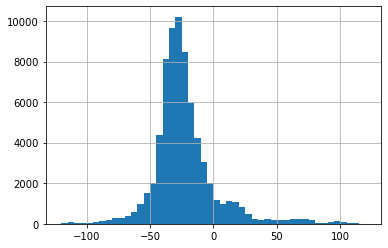

In [64]:
mrbr['brdtime_fsched'].hist(bins=48, range=[-120, 120])

<AxesSubplot:>

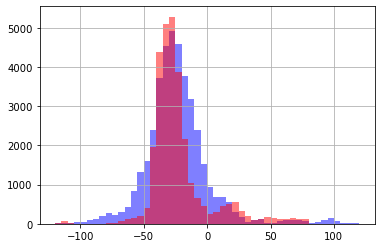

In [65]:
#let's look at the distribution of international vs. domestic boarding times
mrbr.loc[mrbr['International Domestic'] == 'International','brdtime_fsched'].hist(bins=48, range=[-120, 120], alpha = .5, color = 'blue')
mrbr.loc[mrbr['International Domestic'] == 'Domestic','brdtime_fsched'].hist(bins=48, range=[-120, 120], alpha=.5, color='red')
#mrbr['brdtime_fsched'].hist(bins=48, range=[-120, 120])

<AxesSubplot:xlabel='Operating Airline Desc'>

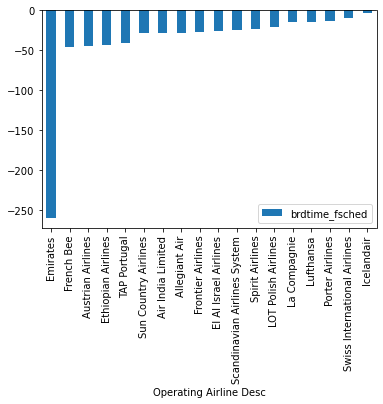

In [66]:
#boarding time by airline
mrbr[['Operating Airline Desc','brdtime_fsched']].groupby(by=['Operating Airline Desc']).mean().sort_values(by='brdtime_fsched').plot(kind='bar')

In [67]:
mr['International Domestic'].value_counts()

Domestic         102895
International     88010
Name: International Domestic, dtype: int64

In [68]:
mrbr['International Domestic'].value_counts()

International    41574
Domestic         30591
Name: International Domestic, dtype: int64

In [69]:
#passenger status? fast_track? frequent flyer?

<AxesSubplot:>

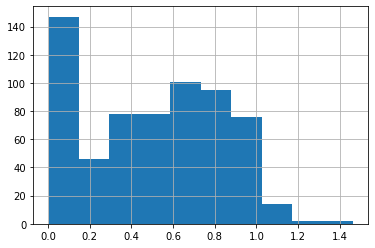

In [70]:
#compare reported load factor against passenger boardings
lf = mrbr[['dt_fl','Total Seats','ID']].groupby(by='dt_fl').agg({'Total Seats':'mean','ID':'count'})
lf['load_factor'] = lf['ID'] / lf['Total Seats']
lf['load_factor'].hist()

In [71]:
lf.sort_values('load_factor')

,Total Seats,ID,load_factor
dt_fl,,,
20210907210EK,354.0,1,0.002825
20210916210EK,354.0,1,0.002825
20210918210EK,354.0,1,0.002825
20210904210EK,354.0,1,0.002825
20210929210EK,354.0,1,0.002825
...,...,...,...
2021092926LY,271.0,316,1.166052
20210902204TP,168.0,199,1.184524
2021092526LY,271.0,329,1.214022


In [72]:
np.sum(lf.ID)

72165

In [73]:
np.sum(lf['Total Seats'])

145232.0

## Deep dive into 1 flight: LH403 from Newark to Frankfurt, departing Sept 17, 2021 at 6:05pm

In [74]:
lh403 = mr[mr['dt_fl'] == '20210917403LH']
lh403.head()

,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2,dt_fl,Date,Military Time,Flight Direction,PA Airport Code,Terminal Desc,Non-PA Airport Code,Non-PA Airport Country Desc,International Domestic,State Desc,Marketing Airline Desc,Marketing Airline ICAO Code_x,Operating Airline Desc,Operating Airline ICAO Code,Flight Number,General Aircraft Desc,Variant Aircraft Desc,Variant Aircraft Code,Total Seats,Flight Distance,Total Flights,datt,month,year,OpAL_IATACode,OpAL_ICAOCode,_merge
3,2BE84DC1-7226-46EA-A7FD-00011653F787,E97173E9C1571FB60A741B406900BD066377A433,2021-09-17 16:50:59,1,EWRBCKB024,2021-09-17 20:51:28.183,Print_BCBP,2ZYTFE,EWR,FRA,LH,403,2021-09-17,M,034H,231,3,16.0,2365562683,0.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-17 20:51:28.183,20210917403LH,2021-09-17,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-17 18:05:00,9.0,2021.0,LH,DLH,both
823,6725C4C6-515A-4F8E-A498-00B0B10628E4,636EACDE9F45A089AA0E7A86CAB4FE025ECFF861,2021-09-17 17:56:46,7,EWRBGTS62B,2021-09-17 21:56:55.120,Scan_BCBP,MSW5RI,EWR,FRA,LH,403,2021-09-17,M,018K,105,3,220.0,2464903978,0.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-17 21:56:55.120,20210917403LH,2021-09-17,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-17 18:05:00,9.0,2021.0,LH,DLH,both
1261,A970AD1F-D834-4011-8D6E-01128FE07CA1,BC307FAEF9A5DC617998FE6F45DA5298A436BEB9,2021-09-17 16:12:44,1,EWRBCKB021,2021-09-17 20:13:21.230,Print_BCBP,2QPMJC,EWR,FRA,LH,403,2021-09-17,M,040A,60,3,220.0,7648707664,3.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-17 21:37:28.380,20210917403LH,2021-09-17,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-17 18:05:00,9.0,2021.0,LH,DLH,both
1312,64395AF1-EE71-45E2-B2FB-011C1D413D39,35A1BDCD5C1FD26B75B6A6D9253E643F620B2366,2021-09-17 17:45:12,7,EWRBGTS62B,2021-09-17 21:45:35.273,Scan_BCBP,PGF4VR,EWR,FRA,LH,403,2021-09-17,M,045G,44,3,220.0,2464953272,0.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-17 21:45:35.277,20210917403LH,2021-09-17,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-17 18:05:00,9.0,2021.0,LH,DLH,both
1399,AEBBB3B8-5161-46F3-8583-01315CBD2C23,C3D7902A7C3B81C4192E9E4030B8D0EEF02E64E7,2021-09-17 16:16:47,1,EWRBCKB030,2021-09-17 20:17:03.987,Print_BCBP,WIFU7B,EWR,FRA,LH,403,2021-09-17,M,019H,73,3,220.0,2464502352,0.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-17 21:50:01.697,20210917403LH,2021-09-17,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-17 18:05:00,9.0,2021.0,LH,DLH,both


In [75]:
#491 SITA records
lh403.shape

(491, 55)

In [76]:
#260 passengers
lh403.HASH_DATA.nunique()

260

In [77]:
#count of SITA records at check-in vs boarding. Most of these are probably the same passenger at both locations, but let's groupby to be sure
lh403.LOCATION_POINT.value_counts()

7    275
1    216
Name: LOCATION_POINT, dtype: int64

In [78]:
#looks like 237 people boarded and almost all of them printed their boarding pass at check-in
# I wonder if you aren't checking a bag, maybe you can check in online, but most people who fly internationally would be checking a bag.
lh403[['HASH_DATA','LOCATION_POINT','EVENT_TYPE']].groupby(by=['LOCATION_POINT','EVENT_TYPE']).agg(lambda x: x.nunique())

HASH_DATA
LOCATION_POINT EVENT_TYPE           
1              Print_BCBP        215
               Scan_BCBP           1
7              Print_BCBP         38
               Scan_BCBP         237

In [79]:
lh403.HASH_DATA.value_counts().sort_values(ascending=False)

F2231AF29F7A251584CB154F6973174DACEFA384    3
D12689ECD92C8D71A7413FAE3ACCFD9E0267D1AD    2
79A6C68D7FD91158365999DF484976900AF9ED69    2
BC307FAEF9A5DC617998FE6F45DA5298A436BEB9    2
35A1BDCD5C1FD26B75B6A6D9253E643F620B2366    2
                                           ..
A5C3C0DC7F7965C92E31ABD214ADC4276802A7D5    1
E212180D2C8A0FD10C6EE14E837D6A1863A0C3FD    1
BBEBE47C19F47FAB9A89B8D70CFB1D20295293BC    1
D4EC05259E6493515DE6BA12F0FA991A67D7A021    1
A536047B5B9FC8115181BDFB42E91048C414AACD    1
Name: HASH_DATA, Length: 260, dtype: int64

In [80]:
#one passenger has 3 records. Looks like he had to have his boarding pass re-printed at boarding
lh403[lh403.HASH_DATA == 'F2231AF29F7A251584CB154F6973174DACEFA384']

,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2,dt_fl,Date,Military Time,Flight Direction,PA Airport Code,Terminal Desc,Non-PA Airport Code,Non-PA Airport Country Desc,International Domestic,State Desc,Marketing Airline Desc,Marketing Airline ICAO Code_x,Operating Airline Desc,Operating Airline ICAO Code,Flight Number,General Aircraft Desc,Variant Aircraft Desc,Variant Aircraft Code,Total Seats,Flight Distance,Total Flights,datt,month,year,OpAL_IATACode,OpAL_ICAOCode,_merge
45130,76187979-4211-495A-B3D2-28499F8B4BB6,F2231AF29F7A251584CB154F6973174DACEFA384,2021-09-17 18:00:06,7,EWRBGTC62A,2021-09-17 22:00:22.220,Print_BCBP,VJVBOS,EWR,FRA,LH,403,2021-09-17,E,024D,168,3,220.0,2465620801,0.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-17 22:00:23.260,20210917403LH,2021-09-17,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-17 18:05:00,9.0,2021.0,LH,DLH,both
51996,EB0ABD6E-A925-4FB1-B104-2EBD1B4DA6FB,F2231AF29F7A251584CB154F6973174DACEFA384,2021-09-17 17:58:48,7,EWRBGTS62B,2021-09-17 21:59:10.607,Scan_BCBP,VJVBOS,EWR,FRA,LH,403,2021-09-17,E,024D,168,3,220.0,2465620801,0.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-17 22:00:23.260,20210917403LH,2021-09-17,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-17 18:05:00,9.0,2021.0,LH,DLH,both
228445,A866678D-99FD-4811-8CE3-FB8798F9374D,F2231AF29F7A251584CB154F6973174DACEFA384,2021-09-17 14:54:27,1,EWRBCKB029,2021-09-17 18:54:33.420,Print_BCBP,VJVBOS,EWR,FRA,LH,403,2021-09-17,E,024D,168,3,220.0,2465620801,0.0,NaN,LH,NaN,NaN,NaN,NaN,NaN,2021-09-17 22:00:23.260,20210917403LH,2021-09-17,18:05:00,Departure,EWR,EWR-Terminal B,FRA,Germany,International,International,Lufthansa,DLH,Lufthansa,DLH,403,Boeing 747,Boeing 747-8,74H,364.0,3869.0,1.0,2021-09-17 18:05:00,9.0,2021.0,LH,DLH,both


In [81]:
#how many passengers only had 1 SITA record? (presumably boarding?)
s1 = lh403.HASH_DATA.value_counts()[lh403.HASH_DATA.value_counts() == 1]
s1.sum()

30

In [82]:
# in fact, there are 16 people who checked in but didn't board. I bet these are people whose seats were changed at the gate
# They probably had new boarding passes printed.
one = lh403[lh403['HASH_DATA'].isin(s1.index)]
one.LOCATION_POINT.value_counts()

1    16
7    14
Name: LOCATION_POINT, dtype: int64

In [83]:
#It does look like some of these were under the same reservation code.
one.PNR.value_counts()

3SB595     3
KY3MWZ     3
ZZZZZZZ    3
2ZYTFE     2
29BH47     2
2VLG8M     2
4L9O32     2
US3YFT     1
2K4ZAO     1
4SEQXA     1
49HB3X     1
VQWTGG     1
S83SFQ     1
LMKBYO     1
2BWLZ7     1
J5HHJR     1
3DYNZD     1
SBQ2PC     1
MMW9FB     1
SU9HTA     1
Name: PNR, dtype: int64

In [84]:
lh403['brdtime_fsched'] = (lh403['EVENT_LOGTIME'] - lh403['datt']).dt.total_seconds()/60

C:\Users\Gabriel\AppData\Local\Temp/ipykernel_23256/4238585132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lh403['brdtime_fsched'] = (lh403['EVENT_LOGTIME'] - lh403['datt']).dt.total_seconds()/60


<AxesSubplot:>

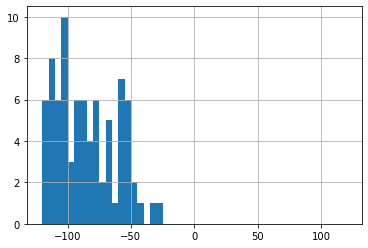

In [85]:
lh403.loc[lh403['LOCATION_POINT'] == 1,'brdtime_fsched'].hist(bins=48, range=[-120, 120])

<AxesSubplot:>

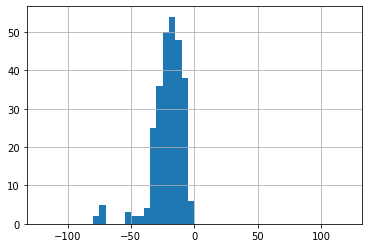

In [86]:
lh403.loc[lh403['LOCATION_POINT'] == 7,'brdtime_fsched'].hist(bins=48, range=[-120, 120])

## Choose some other representative flights

In [163]:
#there are not nearly as many domestic flight destinations as I expected, e.g. no chicago, DC, California, etc.
fsched_0921[['dt_fl','State Desc','Operating Airline Desc','dayperiod']].groupby(['State Desc','dayperiod','Operating Airline Desc']).count()

dt_fl
State Desc     dayperiod Operating Airline Desc             
Florida        afternoon Frontier Airlines                23
                         Spirit Airlines                  64
               evening   Frontier Airlines                62
                         Spirit Airlines                  20
               morning   Allegiant Air                     9
                         Frontier Airlines                34
                         Spirit Airlines                 101
               overnight Spirit Airlines                  37
Georgia        afternoon Delta Air Lines                  60
               evening   Delta Air Lines                  19
                         Spirit Airlines                  30
               morning   Delta Air Lines                 130
                         Frontier Airlines                30
                         Spirit Airlines                  29
International  afternoon Air India Limited                 2
                         Austrian Airlines                30
                         El Al Israel Airlines             4
                         Porter Airlines                  26
                         Scandinavian Airlines System     42
                         TAP Portugal                     30
               evening   El Al Israel Airlines            12
                         Ethiopian Airlines               17
                         French Bee                       14
                         Icelandair                       24
                         LOT Polish Airlines              17
                         La Compagnie                     22
                         Lufthansa                        56
                         Porter Airlines                  14
                         Scandinavian Airlines System      9
                         Swiss International Airlines     26
                         TAP Portugal                      8
               morning   Air India Limited                15
                         El Al Israel Airlines             1
                         Frontier Airlines                30
                         Porter Airlines                  37
               overnight El Al Israel Airlines             2
                         Emirates                         30
                         TAP Portugal                     30
Kentucky       morning   Allegiant Air                     8
Louisiana      afternoon Spirit Airlines                   3
               morning   Spirit Airlines                   8
Massachusetts  afternoon Spirit Airlines                   4
               evening   Spirit Airlines                  25
               morning   Spirit Airlines                   2
Michigan       morning   Allegiant Air                     9
                         Delta Air Lines                  30
Minnesota      afternoon Sun Country Airlines              1
               evening   Delta Air Lines                  15
               morning   Delta Air Lines                  30
                         Sun Country Airlines             15
Nevada         evening   Spirit Airlines                  23
               morning   Spirit Airlines                  30
North Carolina morning   Allegiant Air                     9
Puerto Rico    morning   Spirit Airlines                  30
               overnight Frontier Airlines                 7
South Carolina afternoon Spirit Airlines                   8
               evening   Spirit Airlines                  24
               morning   Spirit Airlines                  32
Tennessee      afternoon Spirit Airlines                   3
               evening   Spirit Airlines                   9
               morning   Allegiant Air                     8
                         Spirit Airlines                  16
Texas          afternoon Spirit Airlines                  29
               evening   Spirit Airlines                   1
               morning   Fron

In [107]:
nk1357 = mr[(mr['dt_fl'] == '202109141357NK')]
nk1357.head()

,ID,HASH_DATA,EVENT_LOGTIME,LOCATION_POINT,WORKSTATION,STAGING_TIMESTAMP,EVENT_TYPE,PNR,FROM_AIRPORT_CODE,TO_AIRPORT_CODE,CARRIER_CODE,FLIGHT_NUMBER,FLIGHT_DATE,COMPARTMENT_CODE,SEAT_NUMBER,SEQUENCE_NUMBER,PASSENGER_STATUS,AIRLINE_NUMERIC_CODE,DOCUMENT_FORM_SN,SELECTEE_INDICATOR,INTERNATIONAL_DOCUMENTATION_VERIFICATION,MARKETING_CARRIER_CODE,FREQUENT_FLYER_DESIGNATOR,FREQUENT_FLYER_NUMBER,IDAD_INDICATOR,FREE_BAGGAGE_ALLOWANCE,FAST_TRACK,STAGING_TIMESTAMP2,dt_fl,Date,Military Time,Flight Direction,PA Airport Code,Terminal Desc,Non-PA Airport Code,Non-PA Airport Country Desc,International Domestic,State Desc,Marketing Airline Desc,Marketing Airline ICAO Code_x,Operating Airline Desc,Operating Airline ICAO Code,Flight Number,General Aircraft Desc,Variant Aircraft Desc,Variant Aircraft Code,Total Seats,Flight Distance,Total Flights,datt,month,year,OpAL_IATACode,OpAL_ICAOCode,_merge
11568,1A2510C9-9E8E-40BA-ACAF-0A06A34DE673,9299B63E27599A830F399B98ACAF067F6193A14E,2021-09-14 20:14:16,1,EWRBAKB014,2021-09-15 00:15:10.580,Print_BCBP,AMS9RB,EWR,BOS,NK,1357,2021-09-14,Y,003F,37,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-15 00:15:14.353,202109141357NK,2021-09-14,20:05:00,Departure,EWR,EWR-Terminal B,BOS,USA,Domestic,Massachusetts,Spirit Airlines,NKS,Spirit Airlines,NKS,1357,Airbus A318/319/320/321,Airbus A320 (Sharklets),32A,182.0,200.0,1.0,2021-09-14 20:05:00,9.0,2021.0,NK,NKS,both
23309,04AE45AC-BFBC-4A68-A274-1484B3613416,DB70DD7E3689D0319DDAFC4B845D6891DF66C958,2021-09-14 19:32:28,1,EWRBCKB097,2021-09-14 23:32:43.737,Print_BCBP,WCU2NF,EWR,BOS,NK,1357,2021-09-14,Y,001F,39,1,487.0,0TT12G7B49,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-14 23:33:44.533,202109141357NK,2021-09-14,20:05:00,Departure,EWR,EWR-Terminal B,BOS,USA,Domestic,Massachusetts,Spirit Airlines,NKS,Spirit Airlines,NKS,1357,Airbus A318/319/320/321,Airbus A320 (Sharklets),32A,182.0,200.0,1.0,2021-09-14 20:05:00,9.0,2021.0,NK,NKS,both
26768,33C3749C-B0F1-4AA4-AD13-17A79CF921AA,205551E48B9C0BD28C0A5D9680BF579D9D25091A,2021-09-14 19:04:48,1,EWRBCKB099,2021-09-14 23:05:47.340,Print_BCBP,BLTL5B,EWR,BOS,NK,1357,2021-09-14,Y,026C,20,3,487.0,0YB2277034,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-14 23:06:17.930,202109141357NK,2021-09-14,20:05:00,Departure,EWR,EWR-Terminal B,BOS,USA,Domestic,Massachusetts,Spirit Airlines,NKS,Spirit Airlines,NKS,1357,Airbus A318/319/320/321,Airbus A320 (Sharklets),32A,182.0,200.0,1.0,2021-09-14 20:05:00,9.0,2021.0,NK,NKS,both
31350,35CDB91E-823F-40EC-B8B2-1BB3CFE41A81,DF933B0A588D9198F76DA761BBAD9F2204B1212A,2021-09-14 19:01:28,1,EWRBAKB001,2021-09-14 23:02:12.633,Scan_BCBP,BLTL5B,EWR,BOS,NK,1357,2021-09-14,Y,026C,20,1,487.0,0YB2277034,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-14 23:02:12.633,202109141357NK,2021-09-14,20:05:00,Departure,EWR,EWR-Terminal B,BOS,USA,Domestic,Massachusetts,Spirit Airlines,NKS,Spirit Airlines,NKS,1357,Airbus A318/319/320/321,Airbus A320 (Sharklets),32A,182.0,200.0,1.0,2021-09-14 20:05:00,9.0,2021.0,NK,NKS,both
32269,BFFC109D-AB26-4C78-B0C2-1C8D0A912132,51DC3F4DD592E21F03874B5AC4D4BC783B387C64,2021-09-14 13:31:19,1,EWRBCKB097,2021-09-14 17:32:03.870,Print_BCBP,WD2TMF,EWR,BOS,NK,1357,2021-09-14,Y,003C,31,1,487.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-14 17:32:03.870,202109141357NK,2021-09-14,20:05:00,Departure,EWR,EWR-Terminal B,BOS,USA,Domestic,Massachusetts,Spirit Airlines,NKS,Spirit Airlines,NKS,1357,Airbus A318/319/320/321,Airbus A320 (Sharklets),32A,182.0,200.0,1.0,2021-09-14 20:05:00,9.0,2021.0,NK,NKS,both


In [108]:
nk1357.shape

(23, 55)

In [110]:
nk1357.LOCATION_POINT.value_counts()

1    23
Name: LOCATION_POINT, dtype: int64